In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

## 기울기 소실/폭발 문제 확인

In [ ]:
def sigmoid(x) :
  return 1/(1+np.exp(-x))

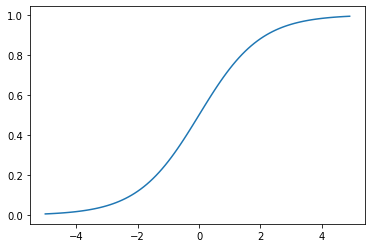

In [ ]:
x = np.arange(-5.0, 5, 0.1)
y = sigmoid(x)
plt.plot(x,y)

## 시그모이드 함수의 계형

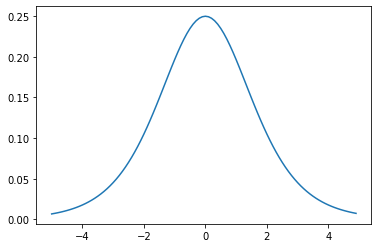

In [ ]:
diff_y = sigmoid(x) * (1 - sigmoid(x))
plt.plot(x, diff_y)

## 기울기 소실/폭발 : 활성화 함수를 변경하여 해결


In [ ]:
torch.manual_seed(1017)

inputs = torch.randn(2,2) # 2행 2열짜리 데이터를 생성

sigmoid_network = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
    )

In [ ]:
torch.manual_seed(777)
targets = torch.randn(2) # label 생성
targets

tensor([-0.4015, -0.5934])

In [ ]:
# 역전파에 필요한 요소들을 설정
# LOSS 함수의 역할 -> 차이를 더 부각시키기 위해 사용
learning_rate = 0.001
criterion = nn.MSELoss(); # LOSS 함수 정의 : MSE
optimizer = torch.optim.Adam(sigmoid_network.parameters(), lr = learning_rate)

In [ ]:
for epoch in range(0,100) : ## 한번 학습하는 것 - epoch => 총 100번을 학습하겠다.
  print('*** Start {} Epoch'.format(epoch + 1)) # epoch마다 시작되는 것을 보겟다.
  sigmoid_network.train() # 모델을 학습 모델로 설정
  pred = sigmoid_network(inputs) # 예측값 할당

  loss = criterion(targets, pred) # loss값 계산
  print('Loss : {}'.format(loss)) # loss값을 epoch마다 보겠다.

  optimizer.zero_grad() # 기울기가 누적이 되는걸 방지 -> 안에 있는 기울기를 전부 0으로 바꾼다.
  loss.backward() # loss값을 통해서 편미분
  optimizer.step() # 가중치를 한스텝 업데이트

  print('Weight : {}'.format(sigmoid_network[0].weight), '\n') # 가중치를 epoch마다 봄


*** Start 1 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0420, -0.3399]], requires_grad=True) 

*** Start 2 Epoch
Loss : 0.9606472253799438
Weight : Parameter containing:
tensor([[-0.0410, -0.3389]], requires_grad=True) 

*** Start 3 Epoch
Loss : 0.9596229791641235
Weight : Parameter containing:
tensor([[-0.0400, -0.3379]], requires_grad=True) 

*** Start 4 Epoch
Loss : 0.958599328994751
Weight : Parameter containing:
tensor([[-0.0390, -0.3369]], requires_grad=True) 

*** Start 5 Epoch
Loss : 0.9575760364532471
Weight : Parameter containing:
tensor([[-0.0380, -0.3359]], requires_grad=True) 

*** Start 6 Epoch
Loss : 0.9565534591674805
Weight : Parameter containing:
tensor([[-0.0370, -0.3349]], requires_grad=True) 

*** Start 7 Epoch
Loss : 0.9555312991142273
Weight : Parameter containing:
tensor([[-0.0360, -0.3339]], requires_grad=True) 

*** Start 8 Epoch
Loss : 0.9545097947120667
Weight : Parameter containing:
tensor([[-0.0350, -0.3329]], requires_grad=T

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Weight : Parameter containing:
tensor([[-0.0210, -0.3189]], requires_grad=True) 

*** Start 23 Epoch
Loss : 0.939259946346283
Weight : Parameter containing:
tensor([[-0.0200, -0.3179]], requires_grad=True) 

*** Start 24 Epoch
Loss : 0.9382487535476685
Weight : Parameter containing:
tensor([[-0.0190, -0.3169]], requires_grad=True) 

*** Start 25 Epoch
Loss : 0.9372382164001465
Weight : Parameter containing:
tensor([[-0.0180, -0.3159]], requires_grad=True) 

*** Start 26 Epoch
Loss : 0.9362283945083618
Weight : Parameter containing:
tensor([[-0.0170, -0.3149]], requires_grad=True) 

*** Start 27 Epoch
Loss : 0.935219407081604
Weight : Parameter containing:
tensor([[-0.0160, -0.3139]], requires_grad=True) 

*** Start 28 Epoch
Loss : 0.934211254119873
Weight : Parameter containing:
tensor([[-0.0150, -0.3129]], requires_grad=True) 

*** Start 29 Epoch
Loss : 0.9332038164138794
Weight : Parameter containing:
tensor([[-0.0140, -0.3119]], requires_grad=True) 

*** Start 30 Epoch
Loss : 0.9321

In [ ]:
torch.manual_seed(1017)

inputs = torch.randn(2,2) # 2행 2열짜리 데이터를 생성

relu_network = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU()
    )

In [ ]:
# 역전파에 필요한 요소들을 설정
# LOSS 함수의 역할 -> 차이를 더 부각시키기 위해 사용
learning_rate = 0.001
criterion = nn.MSELoss(); # LOSS 함수 정의 : MSE
optimizer = torch.optim.Adam(relu_network.parameters(), lr = learning_rate)

In [ ]:
for epoch in range(0,100) : ## 한번 학습하는 것 - epoch => 총 100번을 학습하겠다.
  print('*** Start {} Epoch'.format(epoch + 1)) # epoch마다 시작되는 것을 보겟다.
  relu_network.train() # 모델을 학습 모델로 설정
  pred = relu_network(inputs) # 예측값 할당

  loss = criterion(targets, pred) # loss값 계산
  print('Loss : {}'.format(loss)) # loss값을 epoch마다 보겠다.

  optimizer.zero_grad() # 기울기가 누적이 되는걸 방지 -> 안에 있는 기울기를 전부 0으로 바꾼다.
  loss.backward() # loss값을 통해서 편미분
  optimizer.step() # 가중치를 한스텝 업데이트

  print('Weight : {}'.format(relu_network[0].weight), '\n') # 가중치를 epoch마다 봄


*** Start 1 Epoch
Loss : 0.36954379081726074
Weight : Parameter containing:
tensor([[-0.0420, -0.3399]], requires_grad=True) 

*** Start 2 Epoch
Loss : 0.3676071763038635
Weight : Parameter containing:
tensor([[-0.0410, -0.3389]], requires_grad=True) 

*** Start 3 Epoch
Loss : 0.36567872762680054
Weight : Parameter containing:
tensor([[-0.0400, -0.3379]], requires_grad=True) 

*** Start 4 Epoch
Loss : 0.36375853419303894
Weight : Parameter containing:
tensor([[-0.0390, -0.3369]], requires_grad=True) 

*** Start 5 Epoch
Loss : 0.36184680461883545
Weight : Parameter containing:
tensor([[-0.0380, -0.3359]], requires_grad=True) 

*** Start 6 Epoch
Loss : 0.3599436283111572
Weight : Parameter containing:
tensor([[-0.0370, -0.3349]], requires_grad=True) 

*** Start 7 Epoch
Loss : 0.3580492436885834
Weight : Parameter containing:
tensor([[-0.0360, -0.3339]], requires_grad=True) 

*** Start 8 Epoch
Loss : 0.3561636209487915
Weight : Parameter containing:
tensor([[-0.0350, -0.3329]], requires_g

## 기울기 소실/폭발 - 학습률을 변경하여 해결

In [ ]:
torch.manual_seed(1017)

inputs = torch.randn(2,2) # 2행 2열짜리 데이터를 생성

sigmoid_network = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
    )

다시 선언하는 이유    
  
대부분 실제 작업을 할때는 데이터 관련된 모델이 따로 존재해 학습을 할때 해당 모델을 불러와서 학습을 시킴 -> 즉, 매번 초기 상태의 데이터 모델을 불러온다.  
현재 우리 실습은 같은 파일에서 데이터 모델과 훈련을 동시에 하기 때문에 전의 훈련과정을 통해 데이터 모델이 변경될 수도 있다. -> 따라서 새로운 모델을 다시 선언해서 수행

In [ ]:
# 역전파에 필요한 요소들을 설정
# LOSS 함수의 역할 -> 차이를 더 부각시키기 위해 사용
learning_rate = 0.01
criterion = nn.MSELoss(); # LOSS 함수 정의 : MSE
optimizer = torch.optim.Adam(sigmoid_network.parameters(), lr = learning_rate)

In [ ]:
for epoch in range(0,100) : ## 한번 학습하는 것 - epoch => 총 100번을 학습하겠다.
  print('*** Start {} Epoch'.format(epoch + 1)) # epoch마다 시작되는 것을 보겟다.
  sigmoid_network.train() # 모델을 학습 모델로 설정
  pred = sigmoid_network(inputs) # 예측값 할당

  loss = criterion(targets, pred) # loss값 계산
  print('Loss : {}'.format(loss)) # loss값을 epoch마다 보겠다.

  optimizer.zero_grad() # 기울기가 누적이 되는걸 방지 -> 안에 있는 기울기를 전부 0으로 바꾼다.
  loss.backward() # loss값을 통해서 편미분
  optimizer.step() # 가중치를 한스텝 업데이트

  print('Weight : {}'.format(sigmoid_network[0].weight), '\n') # 가중치를 epoch마다 봄


*** Start 1 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0330, -0.3309]], requires_grad=True) 

*** Start 2 Epoch
Loss : 0.9514468908309937
Weight : Parameter containing:
tensor([[-0.0230, -0.3209]], requires_grad=True) 

*** Start 3 Epoch
Loss : 0.9412741661071777
Weight : Parameter containing:
tensor([[-0.0130, -0.3109]], requires_grad=True) 

*** Start 4 Epoch
Loss : 0.9311579465866089
Weight : Parameter containing:
tensor([[-0.0030, -0.3009]], requires_grad=True) 

*** Start 5 Epoch
Loss : 0.9211024045944214
Weight : Parameter containing:
tensor([[ 0.0070, -0.2909]], requires_grad=True) 

*** Start 6 Epoch
Loss : 0.9111121892929077
Weight : Parameter containing:
tensor([[ 0.0170, -0.2810]], requires_grad=True) 

*** Start 7 Epoch
Loss : 0.9011911153793335
Weight : Parameter containing:
tensor([[ 0.0270, -0.2710]], requires_grad=True) 

*** Start 8 Epoch
Loss : 0.8913434743881226
Weight : Parameter containing:
tensor([[ 0.0369, -0.2610]], requires_grad=